<a href="https://www.kaggle.com/code/eugenetanake/basic-web-scraping-with-python-pt-1?scriptVersionId=97367640" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Hello! In this notebook, I will be performing basic web scraping with python using Beautiful Soup.

The content in this notebook explains my "workings". If you prefer to see the finished and tidied codes please go to the following link:

https://www.kaggle.com/eugenetanake/basic-web-scraping-with-python-express

The following is my experimental subject

https://www.linkedin.com/learning/search?trk=homepage-basic_intent-module-learning

Webpage inspection is done on Google Chrome. Apparently the webpage shows different details according to the browser used.

In [1]:
# importing the libraries
import requests # to allow http requests
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from bs4 import BeautifulSoup
import os

In [2]:
url = 'https://www.linkedin.com/learning/search?trk=homepage-basic_intent-module-learning'
req = requests.get(url)
req.status_code # 200 is an a-okay

200

In [3]:
# we load the response into a BeautifulSoup object
soup = BeautifulSoup(req.text)

The webpage shows a list of links to courses/videos

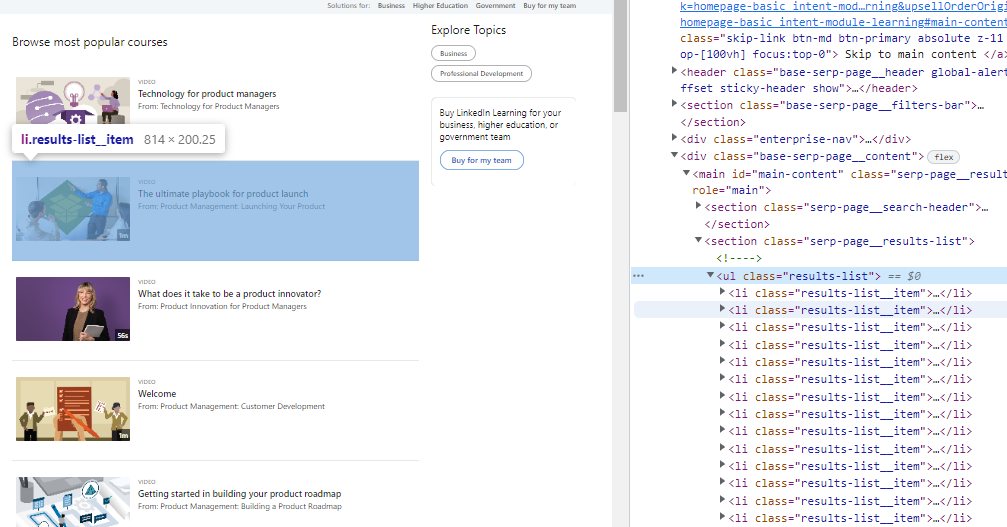

looking at the webpage via right-click -> inspect, we find that each individual course/video is displayed in a \<li> element tag

The class of the \<li> element tags is "results-list__item", so we find all of them using Beautiful Soup

In [4]:
courses = soup.find_all('li',{'class':'results-list__item'})
len(courses) # output: 50

50

However, not all 50 are courses, there are a mix of videos, courses and others in the list.

Through their filter option, I can see all the different types.

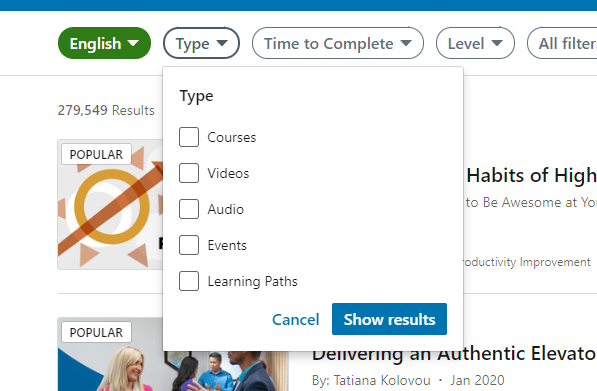

We find that the type identifier is found under \<p class = "base-search-card__identifier">

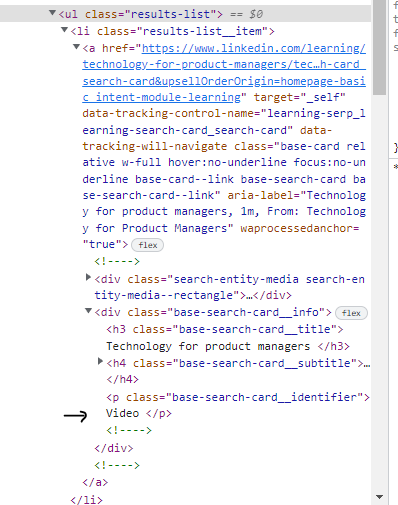

In [5]:
# We attempt to track down that class
courses[0].find('p') # output: class with word Video in it

<p class="base-search-card__identifier">
              
            Video
          
            </p>

In [6]:
# after finding the class, we obtain the text inside it
courses[0].find('p').text # output: string with word Video in it

'\n              \n            Video\n          \n            '

In [7]:
# curious about how the text is like for all 50 boxes, so we look through it all
identifiers = []
for i in courses:
    identifiers.append(i.find('p').text)
set(identifiers)

{'\n              \n            Course\n          \n            ',
 '\n              \n            Video\n          \n            '}

In [8]:
idenDict = dict.fromkeys(set(identifiers),0)
for i in identifiers:
    idenDict[i] +=1
idenDict

{'\n              \n            Video\n          \n            ': 42,
 '\n              \n            Course\n          \n            ': 8}

After looking into each type of identifiers, I find that those with <strong>Video</strong> identifiers only has information about its duration. While those with <strong>Course</strong> identifiers has information about its rating, duration, release date and so on.

At the time of this notebook's creation, the webpage has 42 Videos and 8 Course, which I think is insufficient, so I will use their filter to change it to course-only

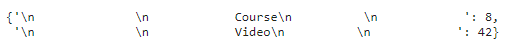

The new link to which I will scrap information from will be the following:

https://www.linkedin.com/learning/search?trk=homepage-basic_intent-module-learning&sortBy=RELEVANCE&entityType=COURSE

First, I shall look at the the information I can extract from those with <strong>Course</strong> identifiers.

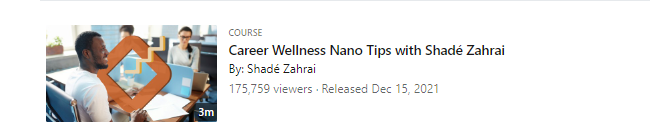

There are a maximum of 6 information I can obtain, which are the url, duration, the name of the course, who it is by, the number of viewers and when it is released.

Not all the courses have the number of viewers available. Looking at the list, those courses seem to be rather new.

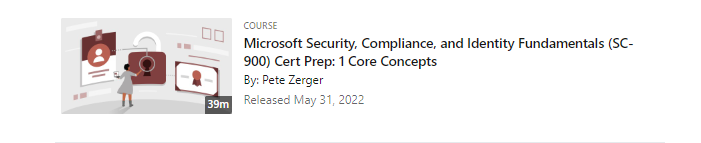

We are able see the name of the course and who it is by from \<h3> and \<h4> element tags

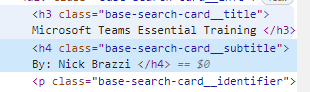

In [9]:
url = 'https://www.linkedin.com/learning/search?trk=homepage-basic_intent-module-learning&sortBy=RELEVANCE&entityType=COURSE'
req = requests.get(url)
req.status_code # 200 is an a-okay

200

In [10]:
soup = BeautifulSoup(req.text)
courses = soup.find_all('li',{'class':'results-list__item'})
len(courses)

50

In [11]:
courses[0].find('h3',{'class':'base-search-card__title'}).text

'\n            Microsoft Teams Essential Training\n          '

In [12]:
courses[0].find('h3',{'class':'base-search-card__title'}).text.strip()

'Microsoft Teams Essential Training'

In [13]:
courses[0].find('h4',{'class':'base-search-card__subtitle'}).text

'\n              \n              By: Nick Brazzi\n          \n            '

In [14]:
courses[0].find('h4',{'class':'base-search-card__subtitle'}).text.strip()

'By: Nick Brazzi'

That settles the Name of the course and who the course is by.

The duration of the course is found under a \<div> element tag

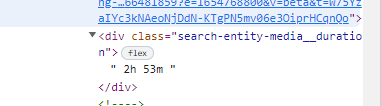

In [15]:
courses[0].find('div',{'class':'search-entity-media__duration'}).text

'\n            \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n\n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n\n        2h 53m\n  \n          '

In [16]:
courses[0].find('div',{'class':'search-entity-media__duration'}).text.strip()

'2h 53m'

For those with both release date and the number of viewers, the release date seems to be sharing the same class as the number of viewers, we shall take both then.

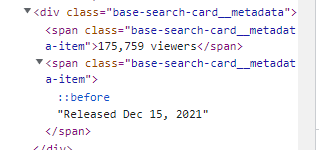

In [17]:
metadataItem = []
for course in courses:
    metadataItem.append(course.find_all('span'))
metadataItem

[[<span class="base-search-card__metadata-item">Released Jun 1, 2022</span>],
 [<span class="base-search-card__metadata-item">Released Jun 1, 2022</span>],
 [<span class="base-search-card__metadata-item">Released Jun 1, 2022</span>],
 [<span class="base-search-card__metadata-item">Released Jun 1, 2022</span>],
 [<span class="base-search-card__metadata-item">Released Jun 1, 2022</span>],
 [<span class="base-search-card__metadata-item">Released Jun 2, 2022</span>],
 [<span class="base-search-card__metadata-item">Released Jun 2, 2022</span>],
 [<span class="base-search-card__metadata-item">Released Jun 2, 2022</span>],
 [<span class="base-search-card__metadata-item">Released May 31, 2022</span>],
 [<span class="base-search-card__metadata-item">Released May 31, 2022</span>],
 [<span class="base-search-card__metadata-item">Released May 31, 2022</span>],
 [<span class="base-search-card__metadata-item">Released May 31, 2022</span>],
 [<span class="base-search-card__metadata-item">Released May

Hmm, it seems like those with viewer count is placed in front of their respective release dates.

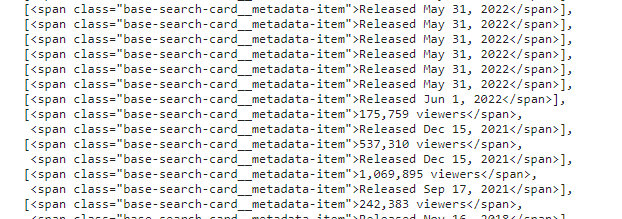

In [18]:
releaseCount = 0
for item in metadataItem:
    for spanclass in item:
        if "Released" in spanclass.text:
            releaseCount +=1
releaseCount # output: 50

50

We know that all courses at least have their release date. And further checks show that the order is always number of viewers first (if available), then the release date

In [19]:
urlList = []
durationList = []
nameList = []
byList = []
viewCountList = []
releaseDateList = []

for course in courses:
    url = course.find(href=True)
    urlList.append(url['href'])
    name = course.find('h3',{'class':'base-search-card__title'}).text.strip()
    nameList.append(name)
    by = course.find('h4',{'class':'base-search-card__subtitle'}).text.strip()
    byList.append(by)
    duration = course.find('div',{'class':'search-entity-media__duration'}).text.strip()
    durationList.append(duration)
    metadataItem = course.find_all('span')
    if "Released" in metadataItem[0].text:
        viewCountList.append(0)
        releaseDateList.append(metadataItem[0].text)
    else:
        viewCountList.append(metadataItem[0].text)
        releaseDateList.append(metadataItem[1].text)

In [20]:
len(viewCountList)

50

Combine the current lists into a dataframe

In [21]:
df = pd.DataFrame(list(zip(nameList,urlList,durationList,byList,viewCountList,releaseDateList)),
                 columns = ['course name','url','duration','by','viewer count','release date'])
df

,course name,url,duration,by,viewer count,release date
0,Microsoft Teams Essential Training,https://www.linkedin.com/learning/microsoft-te...,2h 53m,By: Nick Brazzi,0,"Released Jun 1, 2022"
1,Outlook Quick Tips,https://www.linkedin.com/learning/outlook-quic...,27m,By: Garrick Chow,0,"Released Jun 1, 2022"
2,Introduction to RedisGraph,https://www.linkedin.com/learning/introduction...,1h 13m,By: Ayaka Shinozaki,0,"Released Jun 1, 2022"
3,Azure Dapr for .NET Developers Part 1,https://www.linkedin.com/learning/azure-dapr-f...,1h 47m,By: Rodrigo Díaz Concha,0,"Released Jun 1, 2022"
4,Blockchain Programming in JavaScript,https://www.linkedin.com/learning/blockchain-p...,1h 55m,By: Mohammad Azam,0,"Released Jun 1, 2022"
5,Learning Azure Kubernetes Service (AKS),https://www.linkedin.com/learning/learning-azu...,1h 18m,By: Richard Hooper,0,"Released Jun 2, 2022"
6,Mapping to Learn with Figma,https://www.linkedin.com/learning/mapping-to-l...,31m,By: Drew Bridewell,0,"Released Jun 2, 2022"
7,Git Workflows,https://www.linkedin.com/learning/git-workflow...,1h 4m,By: Kevin Bowersox,0,"Released Jun 2, 2022"
8,CRISC Cert Prep Audio Review,https://www.linkedin.com/learning/crisc-cert-p...,51m,By: Jerod Brennen,0,"Released May 31, 2022"
9,Designing for Developers,https://www.linkedin.com/learning/designing-fo...,10m,By: Joseph Labrecque,0,"Released May 31, 2022"


In [22]:
os.chdir(r'/kaggle/working')

df.to_csv(r'webScrap1.csv', index = False)

This is the end of Part 1. Part 2 will be on extracting extra details from each webpage one by one.

Link: https://www.kaggle.com/code/eugenetanake/basic-web-scraping-with-python-pt-2